# Building a Classifier App with weblink
> Creating an image classifier app that is on the net! Using Jupyter notebooks, FastAi, Binder and Voila

- toc:true- branch: master
- badges: true
- comments: true
- author: Thomas H. Simm
- categories: [fastai, jupyter, Binder, Voila, myBinder, ThomasHSimm]

1) The Model Part

2) The Python Part Of the App

3) The Binder Part

## 1) The model Part

The model was run on https://colab.research.google.com with a GPU

Necessary to have a GPU for time

Some imports and installs

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

Gets Azure search key to use Bing search API

In [ ]:

key = os.environ.get('AZURE_SEARCH_KEY', 'keygoeshere')

I'm going to do a classifier for holiday types

In [ ]:
destas={'beach':{'beach','tropical','sea','beach holidays'},
        'snow':{'ski','snowboard','snow','ski holidays'},
        'countryside':{'lakes mountains','countryside','forest','fields'},
        'city':{'city','cities','bars','buildings'},
        'safari':{'safari','safari holidays','safari park','safari africa'}}

Creates a folder containing images for each type

Need to add to dir with different searches not delete and add new stuff each time

For eaach holiday type- go through the search topics and add the results together before downloading images to the holiday type folder

This gives 600 pics per holiday type

In [ ]:
path = Path('Destinations')
try:
    path.mkdir()
except:
    pass

In [ ]:

# resultsALL
for o in destas:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    for ii,oo in enumerate(destas[o]): 
        # print(oo)
        results = search_images_bing(key, f'{oo}')
        if ii>0:
            resultsALL = L(resultsALL,results).concat()
        else:
            resultsALL=results
    print(o)
    print(np.shape(resultsALL))
    download_images(dest, urls=resultsALL.attrgot('contentUrl'))


Create a data block for fastai

In [ ]:
fns = get_image_files(path)

dests = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

get rid of failed images

In [ ]:
failed = verify_images(fns)
failed.map(Path.unlink)
failed

Have a look at the images


In [ ]:
dls = dests.dataloaders(path)
dls.valid.show_batch(max_n=40, nrows=10)

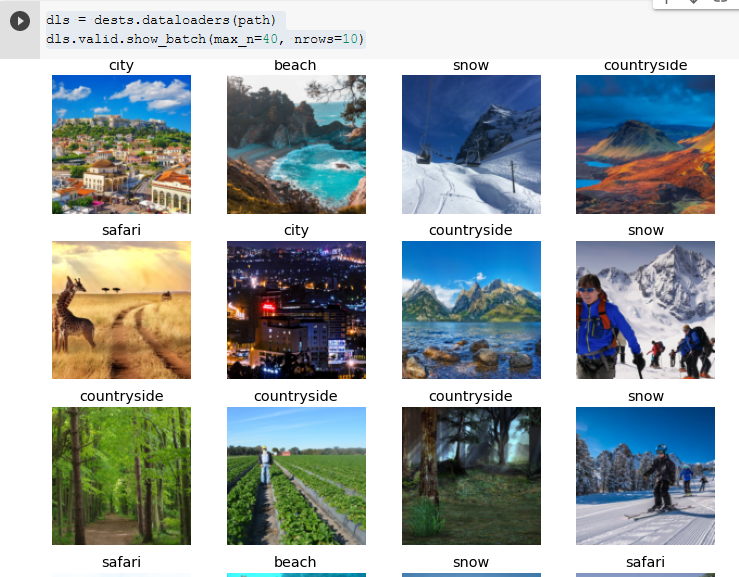

create a dls for the learner

- randomresizedcrop
- default aug transforms


In [ ]:
dests = dests.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dests.dataloaders(path)

Do the learning over 4 epochs

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

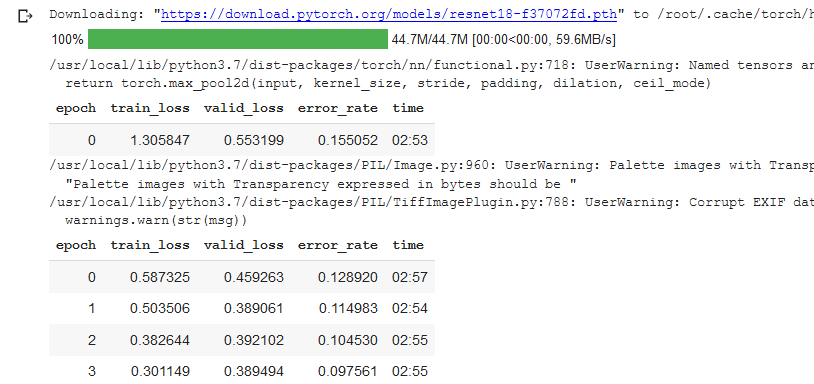

Confusion matrix

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

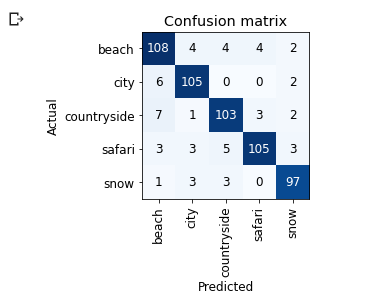

Save the model
(saves as export.pkl)

In [ ]:
learn.export()

## 2) The App in python

Some imports

In [ ]:
# Classifier App
# THSimm

from fastai.vision.all import *
from fastai.vision.widgets import *
import urllib.request

Create parts of the widget

In [ ]:

learn_inf = load_learner('export.pkl')
btn_upload = widgets.FileUpload()

out_pl = widgets.Output()
out_pl.clear_output()

lbl_pred = widgets.Label()

Function occurs on click upload

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(500,500))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
btn_upload.observe(on_click_classify,names=['data'])

What is displayed

In [ ]:
#hide_output
text ='Select your plane'

display(VBox([widgets.HTML(value = f"<h1><font color='Black'>{text}</h1>\
                                     <ol text-align: center><font color='Black'>\
                                    <li>Boeing 737</li>\
                                    <li>Boeing 747</li>\
                                    <li>Boeing 777</li>\
                                    <li>Boeing 787</li>\
                                    <li>Airbus A330</li>\
                                    </ol>"), 
      btn_upload,  out_pl, lbl_pred]) )

## 3) The Binder Part


### Binder
<blockquote>mybinder.org is an online service for building and sharing reproducible and interactive computational environments from online repositories. Under the hood, it is a federation of BinderHub deployments that are maintained by the Binder community. It serves as both a public service and a demonstration of the BinderHub technology, though it is by no means the only BinderHub in existence. If you’re interested in deploying your own BinderHub for your own uses, please see the BinderHub documentation and don’t hesitate to reach out to the Binder community.</blockquote>

https://mybinder.readthedocs.io/en/latest/introduction.html#preparing-a-repository-for-binder

Basically allowing us to put code online

### Voila
The 2nd import part is Voila which allows us to hide the code and just display outputs

https://voila.readthedocs.io/en/stable/using.html

#### Method:
<ul>
<li>Create repository on github that is public, containing the ipynb file and a requirements.txt file</li>

<li>Then go to binder https://mybinder.org/</li>
<li>Fill in form as shown below</li></ul>

In requirements.txt:

voila
fastai
packaging
ipywidgets

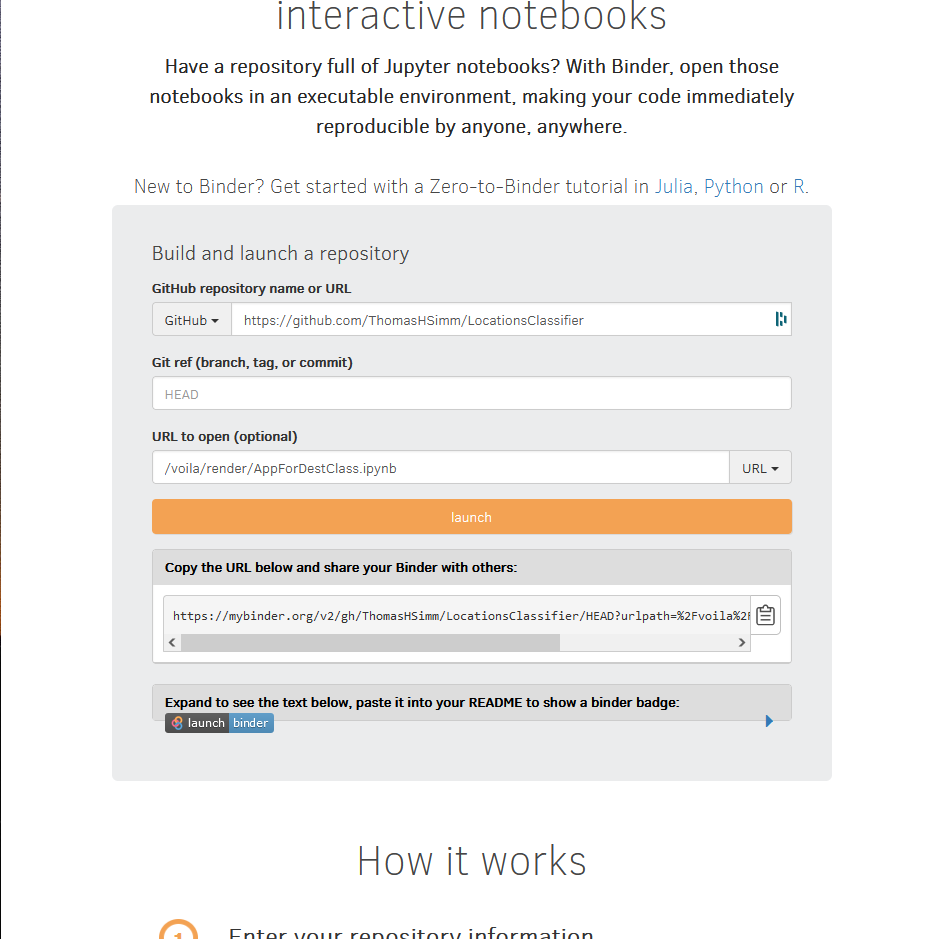

## The result

https://mybinder.org/v2/gh/ThomasHSimm/LocationsClassifier/HEAD?urlpath=%2Fvoila%2Frender%2FAppForDestClass.ipynb

https://tinyurl.com/LocClassAppThomasHSimm 

-------------------- -------------------- -------------------- ----------------


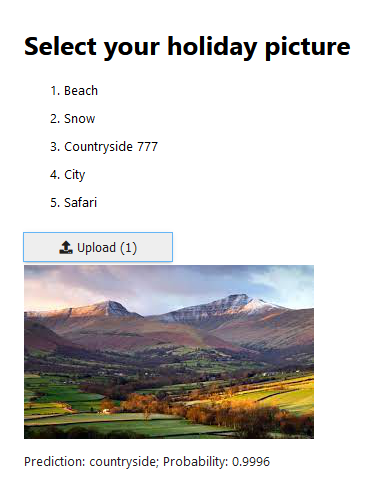
